# Einführung Statistiklabor 
# Beispielaufgabe 2 - Weltmaisproduktion

Lesen Sie die txt-Datei mit der Weltmaisproduktion ein. Beachten Sie dabei die letzten Zeilen aus dem Dokument zu löschen. 

Bestimmen Sie anschließend die **Regressionskurve** mit *Koeffizienten*, *Achsenabschnitt* und dem *Korrelationskoeffizienten* (nur für lineare Regression) bzw. das *Bestimmtheitsmaß* $R^2$.

## 1. Einlesen der Datei und Datenbereinigung

In [10]:
import pandas as pd

# Datei einlesen mit geeignetem Encoding
data = pd.read_csv(
    r'/home/gen69/Python/Statistics/datasets/Maisproduktion.txt',
    sep='\t',
    encoding='latin1'
)

# Entferne Zeilen, in denen 'Jahr' keine Zahl ist
data = data[pd.to_numeric(data['Jahr'], errors='coerce').notna()]

# Optional: Spalten bereinigen
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Jahr in int umwandeln
data['Jahr'] = data['Jahr'].astype(int)

print(data)


   Jahr  Maisproduktion
0  1960           220.0
1  1970           300.0
2  1980           420.0
3  1990           520.0
4  2000           590.0
5  2001           614.0
6  2002           602.0
7  2003           640.0
8  2004           705.0


## 2. Lineare Regression / Lineare Funktion
### 2.1 Streudiagramm erstellen

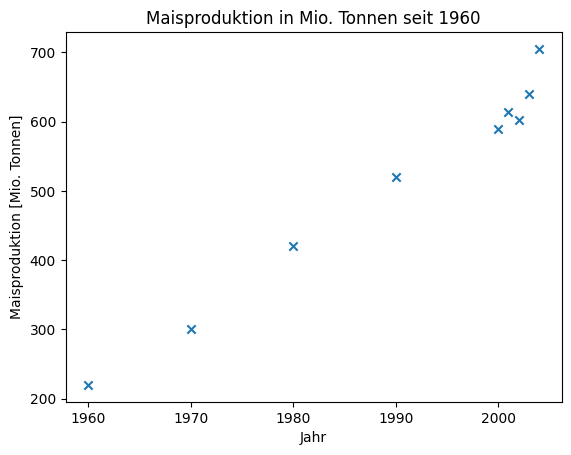

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data['Jahr'], data['Maisproduktion'], marker='x')

plt.xlabel('Jahr')
plt.ylabel('Maisproduktion [Mio. Tonnen]')
plt.title('Maisproduktion in Mio. Tonnen seit 1960')

plt.show()

### 2.2 Lineares Regressionsmodell bestimmen
Die zu bestimmende lineare Funktion soll folgendermaßen lauten:
$$y = ax + b$$ mit der Steigung $a$ und dem Achsenabschnitt $b$.

$a$ und $b$ werden so angepasst, dass für die Jahre $x$ die geschätzte Maisproduktion $\hat y$ möglichst gering von der tatsächlichen Produktion $y$ abweicht.

Der Abstand zwischen allen $y$ und den zugehörigen geschätzten $\hat y$ gibt an, wie gut die einzelnen Koeffizienten (Steigung) und der Achsenabschnitt geschätzt wurden und soll möglichst klein sein:
$$\sum\limits_{i=0}^{n}\left(y_i-\hat y_i \right)^2 \stackrel{!}{=} min$$

In [12]:
from sklearn.linear_model import LinearRegression

# Anlegen (einer Hülle für das) lineare Regressionsmodell
mais_model = LinearRegression()
# mais_model.fit(data['Jahr'], data['Maisproduktion']) # geht nicht, da Daten im falschen Format vorliegen

**Wichtig:** Formatierung der Jahre von Zeilen- in Spaltenvektoren

In [13]:
import numpy as np
# Umformatierung der Jahre in Spaltenvektor notwendig, da nur ein Merkmal mit mehreren Beobachtungen vorliegt
## es könnten auch mehrere Merkmale wie Sonneneinstrahlung, Bodenbeschaffenheit, ... vorliegen
x = data['Jahr'].to_numpy().reshape(-1,1) 

mais_model.fit(x, data['Maisproduktion']) # Schätzen des linearen Regressionsmodells --> a, b

LinearRegression()

#### Steigung und Achsenabschnitt erhalten

In [14]:
mais_model.coef_ # array mit Koeffizienten --> Steigung bzw. a
mais_model.intercept_  # Achsenabschnitt (b)

np.float64(-19357.769953051644)

In [15]:
print('Die Gleichung der Regressionsgeraden für die Weltmaisproduktion lautet: y = %.2fx %.2f' 
      %(mais_model.coef_, mais_model.intercept_))

Die Gleichung der Regressionsgeraden für die Weltmaisproduktion lautet: y = 9.98x -19357.77


/tmp/ipykernel_8729/3419353291.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Die Gleichung der Regressionsgeraden für die Weltmaisproduktion lautet: y = %.2fx %.2f'


### 2.3 Regressionskurve +Korrelationskoeffizient bestimmen
#### Schätzungen der Maisproduktion mithilfe des Modells

In [16]:
y_predict = mais_model.predict(x) # Schätzung mithilfe des Modells der Maisproduktion der bisherigen Produktionsjahre
y_predict 

array([212.78403756, 312.63380282, 412.48356808, 512.33333333,
       612.18309859, 622.16807512, 632.15305164, 642.13802817,
       652.12300469])

Prognose für das "nächste" Jahr 2005:

In [17]:
mais_model.predict([[2005]])

array([662.10798122])

#### Visualisierung der Regressionsgeraden

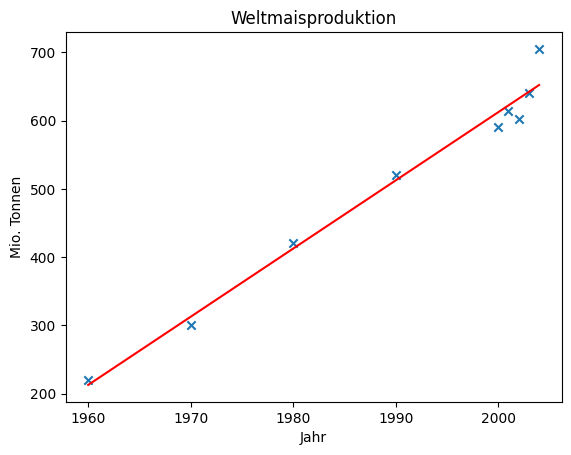

In [18]:
plt.scatter(data['Jahr'], data['Maisproduktion'], marker='x')

plt.plot(data['Jahr'], y_predict, color='red') #linewidth=3

plt.xlabel('Jahr')
plt.ylabel('Mio. Tonnen')
plt.title('Weltmaisproduktion')
plt.show()

#### (Pearson/) Linearer Korrelationskoeffizient $r_{xy}$
$r_{xy} \in [-1;1]$

In [19]:
np.corrcoef(data['Jahr'], data['Maisproduktion'])

array([[1.        , 0.98935241],
       [0.98935241, 1.        ]])

In [20]:
rxy = np.corrcoef(data['Jahr'], data['Maisproduktion'])[0,1]

print('Der lineare Korrelationskoeffizient für das Jahr mit der Maisproduktion lautet: %.4f' 
      %rxy)

Der lineare Korrelationskoeffizient für das Jahr mit der Maisproduktion lautet: 0.9894


#### Bestimmtheitsmaß $R^2$ im Gegensatz zum linearen Korrelationskoeffizienten
$R^2 \in [0;1]$

**Achtung:** nur im linearen Fall gilt: $R^2 = (r_{xy})^2$

In [21]:
mais_model.score(x, data['Maisproduktion'])#.round(4)

0.978818197013097

## 3. Polynom 2. Grades
### 3.1 Preprocessing
$y = a_1 \cdot x^2 + a_2 \cdot x + b$

Da Jahreszahlen quadriert sehr groß werden und somit $a_1$ stärker gewichtet wäre, muss ein Vorverarbeitungsschritt (Preprocessing) eingebaut werden.

#### Standardisierung der Jahreszahlen
$x_{scaled}=\frac{x-\bar x}{s} \to \bar x_{scaled} = 0, s_{scaled}=1$

In [22]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-1.95008126],
       [-1.30005417],
       [-0.65002709],
       [ 0.        ],
       [ 0.65002709],
       [ 0.71502979],
       [ 0.7800325 ],
       [ 0.84503521],
       [ 0.91003792]])

#### Features erzeugen (auch quadriert)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

quad_jahr = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled)
# mit bias=True wäre 1. Spalte für Schätzung von b dabei; Steigung/Offset soll aber seperat geschätzt werden (aktuell überall 1)
quad_jahr

array([[-1.95008126,  3.8028169 ],
       [-1.30005417,  1.69014085],
       [-0.65002709,  0.42253521],
       [ 0.        ,  0.        ],
       [ 0.65002709,  0.42253521],
       [ 0.71502979,  0.51126761],
       [ 0.7800325 ,  0.6084507 ],
       [ 0.84503521,  0.71408451],
       [ 0.91003792,  0.82816901]])

### 3.2 Modell bestimmen
*Modell weiterhin als lineare Regression anlegen, da $x$ und $x^2$ als separate Parameter/Features betrachtet werden können.*

In [24]:
quad_mais_model = LinearRegression()
quad_mais_model.fit(quad_jahr, data['Maisproduktion'])

quad_mais_model.coef_              # erste Stelle a_2, zweite a_1
quad_mais_model.intercept_         # gibt bias/Steigung an (b)

np.float64(507.8632607341388)

### 3.3 Regressionskurve + Bestimmtheitsmaß bestimmen

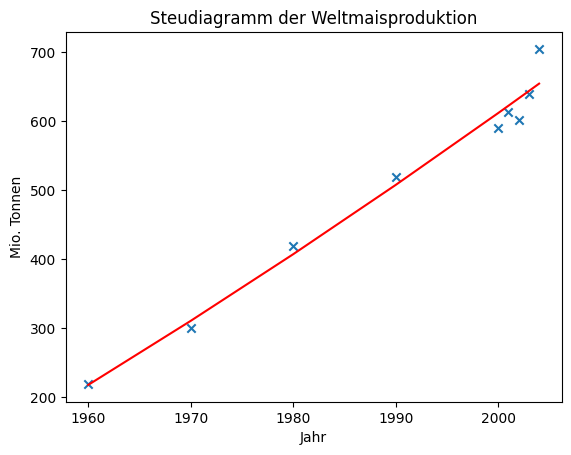

In [25]:
quad_mais_predict = quad_mais_model.predict(quad_jahr) # Schätzung der Maisproduktion mithilfe des Modells

plt.scatter(data['Jahr'], data['Maisproduktion'], marker='x')
plt.plot(x,quad_mais_predict,color='red')

plt.xlabel('Jahr')
plt.ylabel('Mio. Tonnen')
plt.title('Steudiagramm der Weltmaisproduktion')
plt.show()

In [26]:
r_sqr_quad = quad_mais_model.score(quad_jahr, data['Maisproduktion'])
print('Das Bestimmtheitsmaß lautet: %.4f' % r_sqr_quad)

Das Bestimmtheitsmaß lautet: 0.9792


## 4. Polynom 6. Grades
### 4.1 Modell bestimmen
$y = b + a_1 \cdot x + a_2 \cdot x^2 + a_3 \cdot x^3 + a_4 \cdot x^4 + a_5 \cdot x^5 + a_6 \cdot x^6$

In [27]:
six_jahr = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_scaled)

six_mais_model = LinearRegression()
six_mais_model.fit(six_jahr, data['Maisproduktion']) # Maisdaten sind die y Werte

six_mais_model.coef_
six_mais_model.intercept_

np.float64(519.8557165986157)

###  4.2 Bestimmheitsmaß bestimmen

In [28]:
r_sqr_q = six_mais_model.score(six_jahr, data['Maisproduktion'])
print('Das Bestimmtheitsmaß lautet: %.4f' % r_sqr_q)

Das Bestimmtheitsmaß lautet: 0.9982


### 4.3 Regressionskurve zeichnen
**Achtung:** Zuerst müssen mehr Jahresdaten erzeugt, da mit nur 9 Datenpunkte (Jahren) das Polynom 6. Grades nicht gut abgebildet werden kann.

In [29]:
y = np.arange(1960, 2005).reshape(-1,1) 

y_scaled = (y-np.mean(x))/np.std(x) # wieder skalieren, ABER gleiche Skalierung wie x-Werte, deswegen nicht StandardScaler

six_jahr_y = PolynomialFeatures(degree=6, include_bias=False).fit_transform(y_scaled)

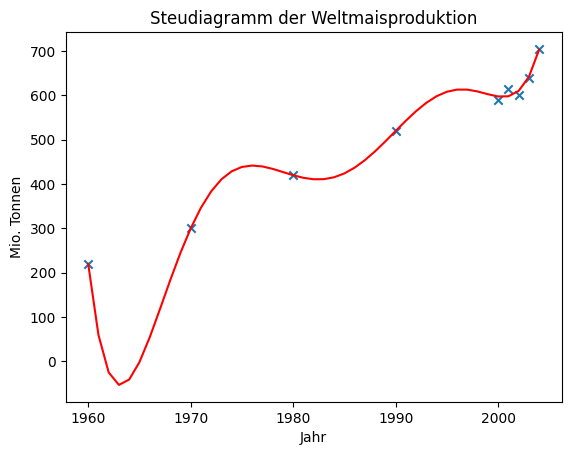

In [30]:
six_mais_predict = six_mais_model.predict(six_jahr_y)

plt.plot(y,six_mais_predict,color='red')

plt.scatter(data['Jahr'], data['Maisproduktion'], marker='x')
plt.xlabel('Jahr')
plt.ylabel('Mio. Tonnen')
plt.title('Steudiagramm der Weltmaisproduktion')

plt.show()

## 5. Regression bestimmen über e-Funktion
### 5.1 e-Funktion anlegen
$y = a_0 \cdot {\rm e}^{a_1x}$

In [31]:
# eigene Funktion definieren:
def f_exp(x, a0,a1):
    return a0*np.exp(x*a1)

#Test:
f_exp(1,1,1) # --> Ergebnis ist gleich e

np.float64(2.718281828459045)

### 5.2 Regressionskurve fitten
Nicht mehr im linearen Fall, deswegen neue Funktion *curve_fit*:

In [32]:
from scipy.optimize import curve_fit
# Skalieren der Daten
jahr_scaled = (data['Jahr']-np.mean(data['Jahr']))/np.std(data['Jahr'])

# curve_fit(Funktion über die gefitted werden soll, x-Werte, y-Werte)
curve_fit(f_exp, jahr_scaled, data['Maisproduktion'])  # Ausgabe 2 Arrays: 1. Koeffizienten; 2. Covarianz-Matrix

# Speichern der zwei Ausgabe-Arrays in zwei Variablen
coefs_exp, cov_exp = curve_fit(f_exp, jahr_scaled, data['Maisproduktion'])
coefs_exp # 1. Wert im Array ist Koeffizient für a_0; zweiter für a_1

array([4.86087581e+02, 3.45087541e-01])

### 5.3 Modellschätzungen
Maisproduktion mithilfe der bestimmten Koeffizienten für die einzelnen Jahre schätzen:

In [33]:
exp_predict = f_exp(jahr_scaled, *coefs_exp) 
#mit Stern: wird genau an jedem einzelnen coeff ausgewertet/ nimmt jedes coeff
exp_predict

0    248.002808
1    310.367264
2    388.414306
3    486.087581
4    608.322437
5    622.122295
6    636.235205
7    650.668268
8    665.428746
Name: Jahr, dtype: float64

### 5.4 Regressionskurve zeichnen

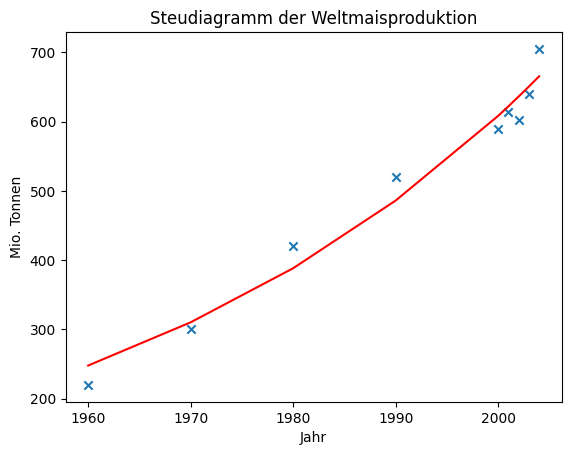

In [34]:
plt.plot(data['Jahr'],exp_predict,color='red')

plt.scatter(data['Jahr'], data['Maisproduktion'], marker='x')
plt.xlabel('Jahr')
plt.ylabel('Mio. Tonnen')
plt.title('Steudiagramm der Weltmaisproduktion')

plt.show()

### 5.5 Bestimmtheitsmaß $R^2$
Für den allgemeinen Fall gilt (a):<br>
$$R^2 = \frac{SQE}{SQT} 
      = \frac{\sum_{i=1}^{n} \left(\hat y_i-\bar{y}\right)^2}{\sum_{i=1}^{n} \left(y_i - \bar{y}\right)^2} $$
nur für den linearen Fall gilt (b): <br>
$$R^2 = 1 - \frac{\sum_{i=1}^{n} \left(y_i-\hat y_i\right)^2}{\sum_{i=1}^{n} \left(y_i -\bar{y}\right)^2}$$

In [35]:
# zu (a):
y_mean = np.mean(data['Maisproduktion'])

sumsquared_e = np.sum((exp_predict-y_mean)**2)
sumsquared_t = np.sum((data['Maisproduktion']-y_mean)**2)

R_squared_exp = sumsquared_e/sumsquared_t
R_squared_exp.round(4)

np.float64(0.949)

## 6. Logarithmus-Funktion
### 6.1 Funktion anlegen und Modell fitten
eigentliche Funktion: $f(x) = a_0 \cdot log(x) + a1$, es werden später aber schon die Jahre logarithmiert und von daher sieht die Funktion so aus: $$f(x) = a_0 \cdot x_{log} + a1$$

In [36]:
def f_log(z, a0,a1): return a0*z+a1

In [37]:
x_log = np.log(data['Jahr'])

coefs_log, cov_log = curve_fit(f_log, x_log, data['Maisproduktion'])

### 6.2 Modellschätzung + Bestimmtheitsmaß betimmen

In [38]:
log_predict = f_log(x_log, *coefs_log)
log_predict

0    212.087598
1    312.876237
2    413.154552
3    512.927684
4    612.200698
5    622.100686
6    631.995727
7    641.885827
8    651.770991
Name: Jahr, dtype: float64

In [39]:
# zu (a):
sumsquared_e = np.sum((log_predict-y_mean)**2)

R_squared_log = sumsquared_e/sumsquared_t
R_squared_log.round(4)

np.float64(0.9787)

In [40]:
# zu (b):
sumsquared_ne = np.sum((data['Maisproduktion']-log_predict)**2)

R_squared_log2 = 1-(sumsquared_ne/sumsquared_t)
R_squared_log2.round(4)

np.float64(0.9787)

**Zusatz: Bestimmung mithilfe eingebauter Funktion**

Über die sklearn-Bibliothek kann eine Funktion zur direkten Bestimmung des Bestimmheitsmaßes geladen und verwendet werden. <br>
Dafür werden wieder nur die beobachteten/tatsächlichen **y-Werte und die geschätzten Werte** benötigt und nicht wie über die LinearRegression-Bibiliothek ein **Modell**.

In [41]:
from sklearn.metrics import r2_score

r2_score(data['Maisproduktion'], log_predict).round(4) # r2_score(y, y_predict)

AttributeError: 'float' object has no attribute 'round'